# Zad 1.

Wygeneruj dane z rozkładu jednostajnego na odcinku $[-1,1]$. 
Narysuj na jednym wykresie histogram z danych oraz gęstość rozkładu normalnego o parametrach $m=0$ oraz $sigma =1$.

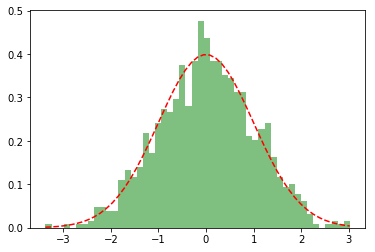

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

N = 1000
mu = 0 # mean of distribution
sigma = 1 # standard deviation of distribution
num_bins = 50

#X = np.concatenate((np.random.normal(0, 1, N) ,np.random.normal(5, 1, N)))
X = np.random.normal(mu, sigma, N)
n, bins, patches = plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.show()

# Zad 2.

Wygeneruj dane z rozkładu jednostajnego na odcinku [-1,1]. 
Narysuj histogram z danych oraz optymalny (najlepszy z punktu widzenia MLE http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf) rozkład normalny opisujący dane.
Użyj estymatorów największej wiarygodności dla $m$ i $sigma$.

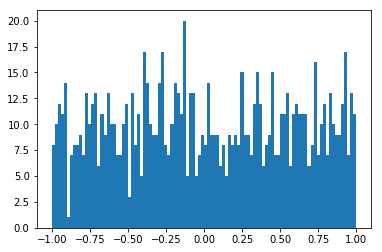

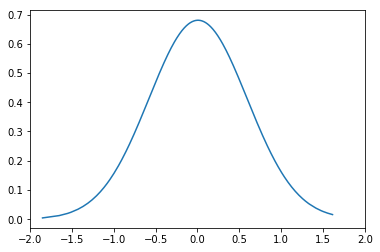

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy.random as rnd

data = np.random.uniform(-1, 1, 1000)
plt.hist(data, bins = 100)
plt.show()

data = rnd.normal(np.mean(data), np.std(data), 1000)
data.sort()
fit = norm.pdf(data,np.mean(data),np.std(data))
plt.plot(data,fit)
plt.xlim(-2,2)
plt.show()

# Zad 3.

Wygeneruj dane z rozkładu normalnego o parametrach $m=0$ oraz $sigma =1$. 
Narysuj histogram z danych oraz optymalny (najlepszy z punktu widzenia MLE) rozkład normalny opisujący dane.

Użyj estymatorów największej wiarygodności dla m i sigma.

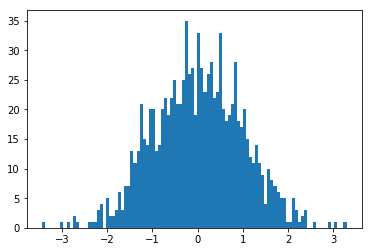

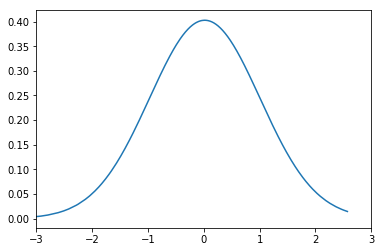

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy.random as rnd

data = np.random.normal(0, 1, 1000)
plt.hist(data, bins = 100)
plt.show()

data = rnd.normal(np.mean(data), np.std(data), 1000)
data.sort()
fit = norm.pdf(data,np.mean(data),np.std(data))
plt.plot(data,fit)
plt.xlim(-3,3)
plt.show()

# Zad 4.

Wygeneruj dane z rozkładu jednostajnego na odcinku [-1,1]. 
Napisz funkcję wyliczającą wartość logarytmicznej funkcji wiarygodności względem rodziny rozkładów normalnych dla zadanego zbioru danych. Policz jej wartość dla próbki oraz:

  * $m = 0$, $sigma =1$
  * $m = 1$, $sigma =1.1$
  * $m = 0$, $sigma =0.9$
  * $m = 1$, $sigma =1$

In [4]:
import numpy as np

def logFunction(data,m,std):
    n = data.__len__()
    sum = 0
    for i in range(0,n):
        sum += (data[i]-m)**2
    return -1/2*(n*np.math.log(2*np.pi/(std)**2)-sum/(std)**2)

data = np.random.uniform(-1, 1, 1000)
print(logFunction(data,0,1))
print(logFunction(data,1,1.1))
print(logFunction(data,0,0.9))
print(logFunction(data,1,1))

-743.601686755
-259.74071168
-807.833806332
-236.634486723


# Zad 5.

Wygeneruj dane z rozkładu normalnego o parametrach $m=0$ oraz $sigma =1$. 
Zminimalizuj zlogarytmowaną funkcję wiarygodności dla rodziny rozkładów normalnych względem parametrów m i sigma. Narysuj histogram z danych oraz optymalny (najlepszy z punktu widzenia MLE) rozkład normalny opisujący dane.

Użyj wyliczonych wartości m i sigma.

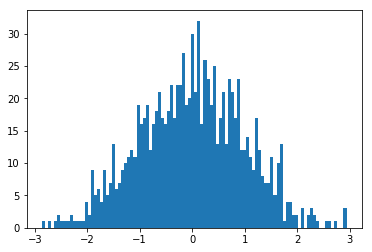

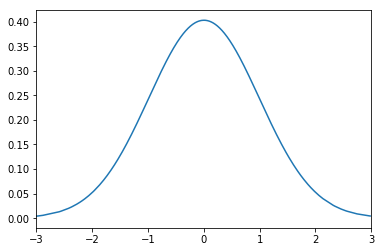

In [8]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.stats import norm

def logFunction(params,data):
    n = data.__len__()
    m,std=params
    sum = 0
    for i in range(0,n):
        sum += (data[i]-m)**2
    return -1/2*(n*np.math.log(2*np.pi/(std)**2)-sum/(std)**2)

data = np.random.normal(0, 1, 1000)
plt.hist(data, bins = 100)
plt.show()

x = sc.minimize(logFunction,[0,1],args=(data)).x
data = rnd.normal(x[0], x[1], 1000)
data.sort()
fit = norm.pdf(data,x[0], x[1])
plt.plot(data,fit)
plt.xlim(-3,3)
plt.show()

# Zad 6.
Wygeneruj dane z rozkładu jednostajnego na odcinku $[-1,1]$. Zminimalizuj zlogarytmowaną funkcję wiarygodności dla rodziny rozkładów Split Normal Distribution http://ww2.ii.uj.edu.pl/~spurek/AD_15_16/1.pdf względem parametrów m, sigma i tau. Narysuj histogram z danych oraz optymalny (najlepszy z punktu widzenia MLE) rozkład Split Normal Distribution.

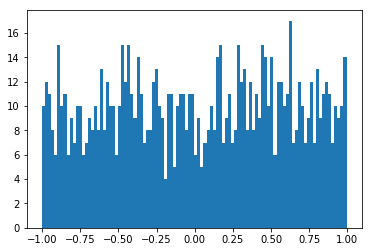

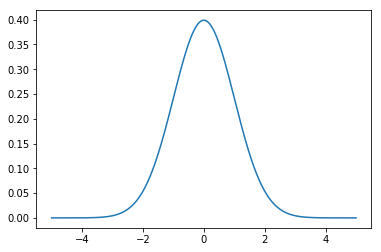

In [11]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt

def logSN(params,x):
    m, sigma, tau = params
    c = np.math.sqrt(2 / np.math.pi) / (sigma * (1 + tau))
    sum = 0
    for i in range(0,x.__len__()):
        if x[i] > m:
            sum *= np.math.log(c * np.exp((-1)*(x[i]-m)**2 / (2 * sigma**2 * tau**2)))
        else:
            sum *= np.math.log((c * np.exp((-1)*(x[i]-m)**2 / (2 * sigma**2))))
    return sum

def SN(x, m, sigma, tau):
    c = np.math.sqrt(2 / np.math.pi) / (sigma * (1 + tau))
    if x > m:
        return c * np.exp((-1)*(x-m)**2 / (2 * sigma**2 * tau**2))
    else:
        return c * np.exp((-1)*(x-m)**2 / (2 * sigma**2))

def SNx(x, m, sigma, tau):
    y = []
    for i in range(0, x.__len__()):
        y.append(SN(x.__getitem__(i), m, sigma, tau))
    return y

data = np.random.uniform(-1, 1, 1000)
plt.hist(data, bins = 100)
plt.show()

x = sc.minimize(logSN,[0,1,1],args=(data)).x
xpts = np.linspace(-5, 5, 1000)
plt.plot(xpts, SNx(xpts,x[0],x[1],x[2]))
plt.show()

# Zad 7.
Pobierz dowolny plik z dźwiękiem. Zminimalizuj zlogarytmowaną funkcję wiarygodności dla rodziny rozkładów:

  * Rozkładów normalnych
  * Split Normal Distribution

Narysuj wyniki ora porównaj wartości zlogarytmowanej funkcji wiarygodności.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


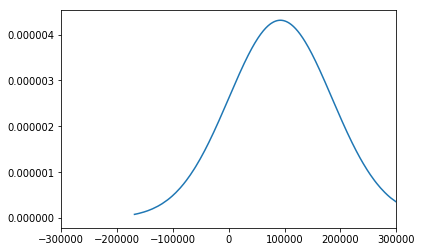

In [13]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.stats import norm
import wave

def logFunction(params,data):
    n = data.__len__()
    m,std=params
    sum = 0
    for i in range(0,n):
        sum += (data[i]-m)**2
    return -1/2*(n*np.math.log(2*np.pi/(std)**2)-sum/(std)**2)

def logSN(params,x):
    m, sigma, tau = params
    c = np.math.sqrt(2 / np.math.pi) / (sigma * (1 + tau))
    sum = 0
    for i in range(0,x.__len__()):
        if x[i] > m:
            sum *= np.math.log(c * np.exp((-1)*(x[i]-m)**2 / (2 * sigma**2 * tau**2)))
        else:
            sum *= np.math.log((c * np.exp((-1)*(x[i]-m)**2 / (2 * sigma**2))))
        print(sum)
    return sum

def SN(x, m, sigma, tau):
    c = np.math.sqrt(2 / np.math.pi) / (sigma * (1 + tau))
    if x > m:
        return c * np.exp((-1)*(x-m)**2 / (2 * sigma**2 * tau**2))
    else:
        return c * np.exp((-1)*(x-m)**2 / (2 * sigma**2))

def SNx(x, m, sigma, tau):
    y = []
    for i in range(0, x.__len__()):
        y.append(SN(x.__getitem__(i), m, sigma, tau))
    return y

spf = wave.open('Kalimba.wav','r')

data = np.fromstring(spf.readframes(-1),'Int16')
data = data[0:1000]
x = sc.minimize(logFunction,[0,1],args=(data)).x
d = rnd.normal(x[0], x[1], 1000)
d.sort()
fit = norm.pdf(d,x[0], x[1])
plt.plot(d,fit)
plt.xlim(-300000,300000)
plt.show()